In [49]:
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
data = """
Year,Average Temperature (Celsius)
1975,13.94
1976,13.86
1977,14.11
1978,14.02
1979,14.09
1980,14.16
1981,14.22
1982,14.04
1983,14.25
1984,14.07
1985,14.03
1986,14.12
1987,14.27
1988,14.29
1989,14.19
1990,14.37
1991,14.32
1992,14.14
1993,14.14
1994,14.25
1995,14.37
1996,14.23
1997,14.40
1998,14.56
1999,14.32
2000,14.31
2001,14.46
2002,14.52
""" 

In [15]:
df = pd.read_csv(io.StringIO(data))


In [16]:
df

,Year,Average Temperature (Celsius)
0,1975,13.94
1,1976,13.86
2,1977,14.11
3,1978,14.02
4,1979,14.09
5,1980,14.16
6,1981,14.22
7,1982,14.04
8,1983,14.25
9,1984,14.07


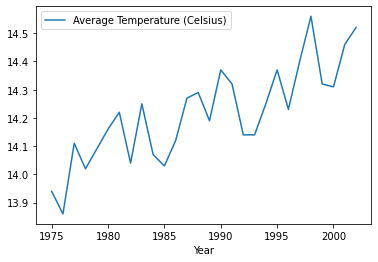

In [18]:
df.plot(x="Year", y="Average Temperature (Celsius)")

In [19]:
df["Bias"] = 1

In [20]:
df

,Year,Average Temperature (Celsius),Bias
0,1975,13.94,1
1,1976,13.86,1
2,1977,14.11,1
3,1978,14.02,1
4,1979,14.09,1
5,1980,14.16,1
6,1981,14.22,1
7,1982,14.04,1
8,1983,14.25,1
9,1984,14.07,1


In [37]:
features = df.loc[:, ["Bias", "Year"]].to_numpy()
target = df.loc[:, ["Average Temperature (Celsius)"]].to_numpy()

In [38]:
features.shape

(28, 2)

In [39]:
target.shape

(28, 1)

In [42]:
learned_parameters = np.linalg.inv(features.T @ features) @ features.T @ target

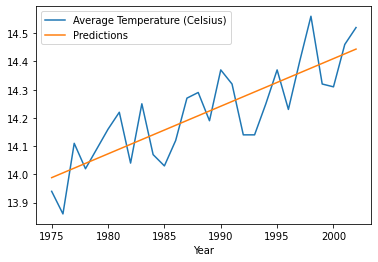

In [54]:
ts = np.arange(1975, 2003, 1).reshape((-1, 1))
bias = np.ones(ts.shape)
new_features = np.hstack((bias, ts))
predictions = new_features @ learned_parameters

_ = df.plot(x="Year", y="Average Temperature (Celsius)")
_ = plt.plot(ts, predictions, label="Predictions")
_ = plt.legend()